imports

In [1]:
from PIL import Image
from glob import glob
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.style.use("bmh")

In [19]:
def printDiagram(img_path, title=''):
    im = Image.open(img_path)
    im = im.convert("L")
    pixels = im.getdata()

    # Anzahl der Pixel
    n = len(pixels)

    # Mittelwert
    mean = 0;
    for pixel in pixels:
        mean += pixel
    mean = mean / n

    # Varianz
    var = 0;
    for pixel in pixels:
        var += (pixel - mean) ** 2
    var = var / n

    # Standardabweichung
    std = sqrt(var)
    
    # Darstellung
    
    plt.subplots(1, 1, figsize=(10, 5))
    # Punkte Zeichnen
    plt.plot(pixels, '.')
    # Durchschnitt
    plt.plot([0, n], [mean, mean], 'r')
    # Standardabweichung
    plt.plot([0, n], [mean + std, mean + std], 'm--')
    plt.plot([0, n], [mean - std, mean - std], 'm--')
    
    # Beschriftungen
    if (title == ''): title = img_path
    plt.title(title)
    plt.xlabel('Pixelindex')
    plt.ylabel('Helligkeit')
    plt.text(10, mean - 10, '$\\bar{x}=' + str(round(mean)) + '$', fontsize=20, color='r')
    plt.text(n - 400, mean + std + 8,  '$\\bar{x}+\sigma=' + str(round(mean + std)) + '$', fontsize=20, color='m')
    plt.text(n - 400, mean - std - 10, '$\\bar{x}-\sigma=' + str(round(mean - std)) + '$', fontsize=20, color='m')
    # Achsen
    axes = plt.gca()
    axes.set_xlim(0, n)
    axes.set_ylim(80, 200)

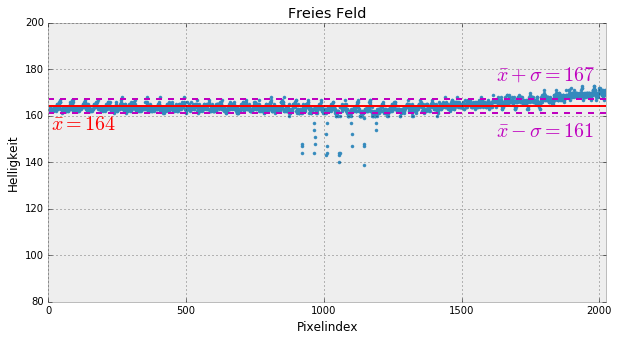

In [20]:
printDiagram('Feld_frei.png', 'Freies Feld')

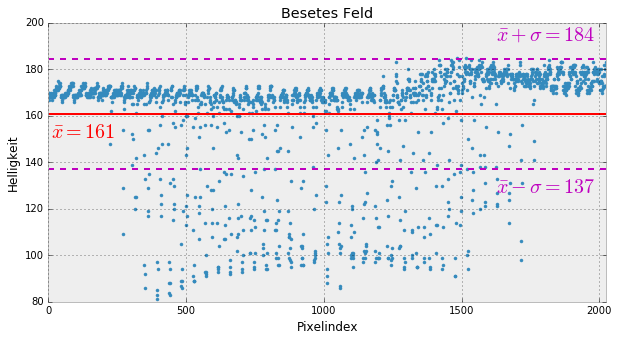

In [21]:
printDiagram('Feld_besetzt.png', 'Besetes Feld')